In [ ]:
import pandas as pd
from google.colab import drive


file_path = '/content/drive/MyDrive/projet ets/Raw data.csv'

df = pd.read_csv(file_path)

threshold = len(df) * 0.05

df = df.dropna(axis=1, thresh=threshold)

df.to_csv('/content/drive/MyDrive/projet ets/corelation final/csv5percentRemoved.csv', index=False)


<ipython-input-25-cdf4f579fdc3>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='Reds')


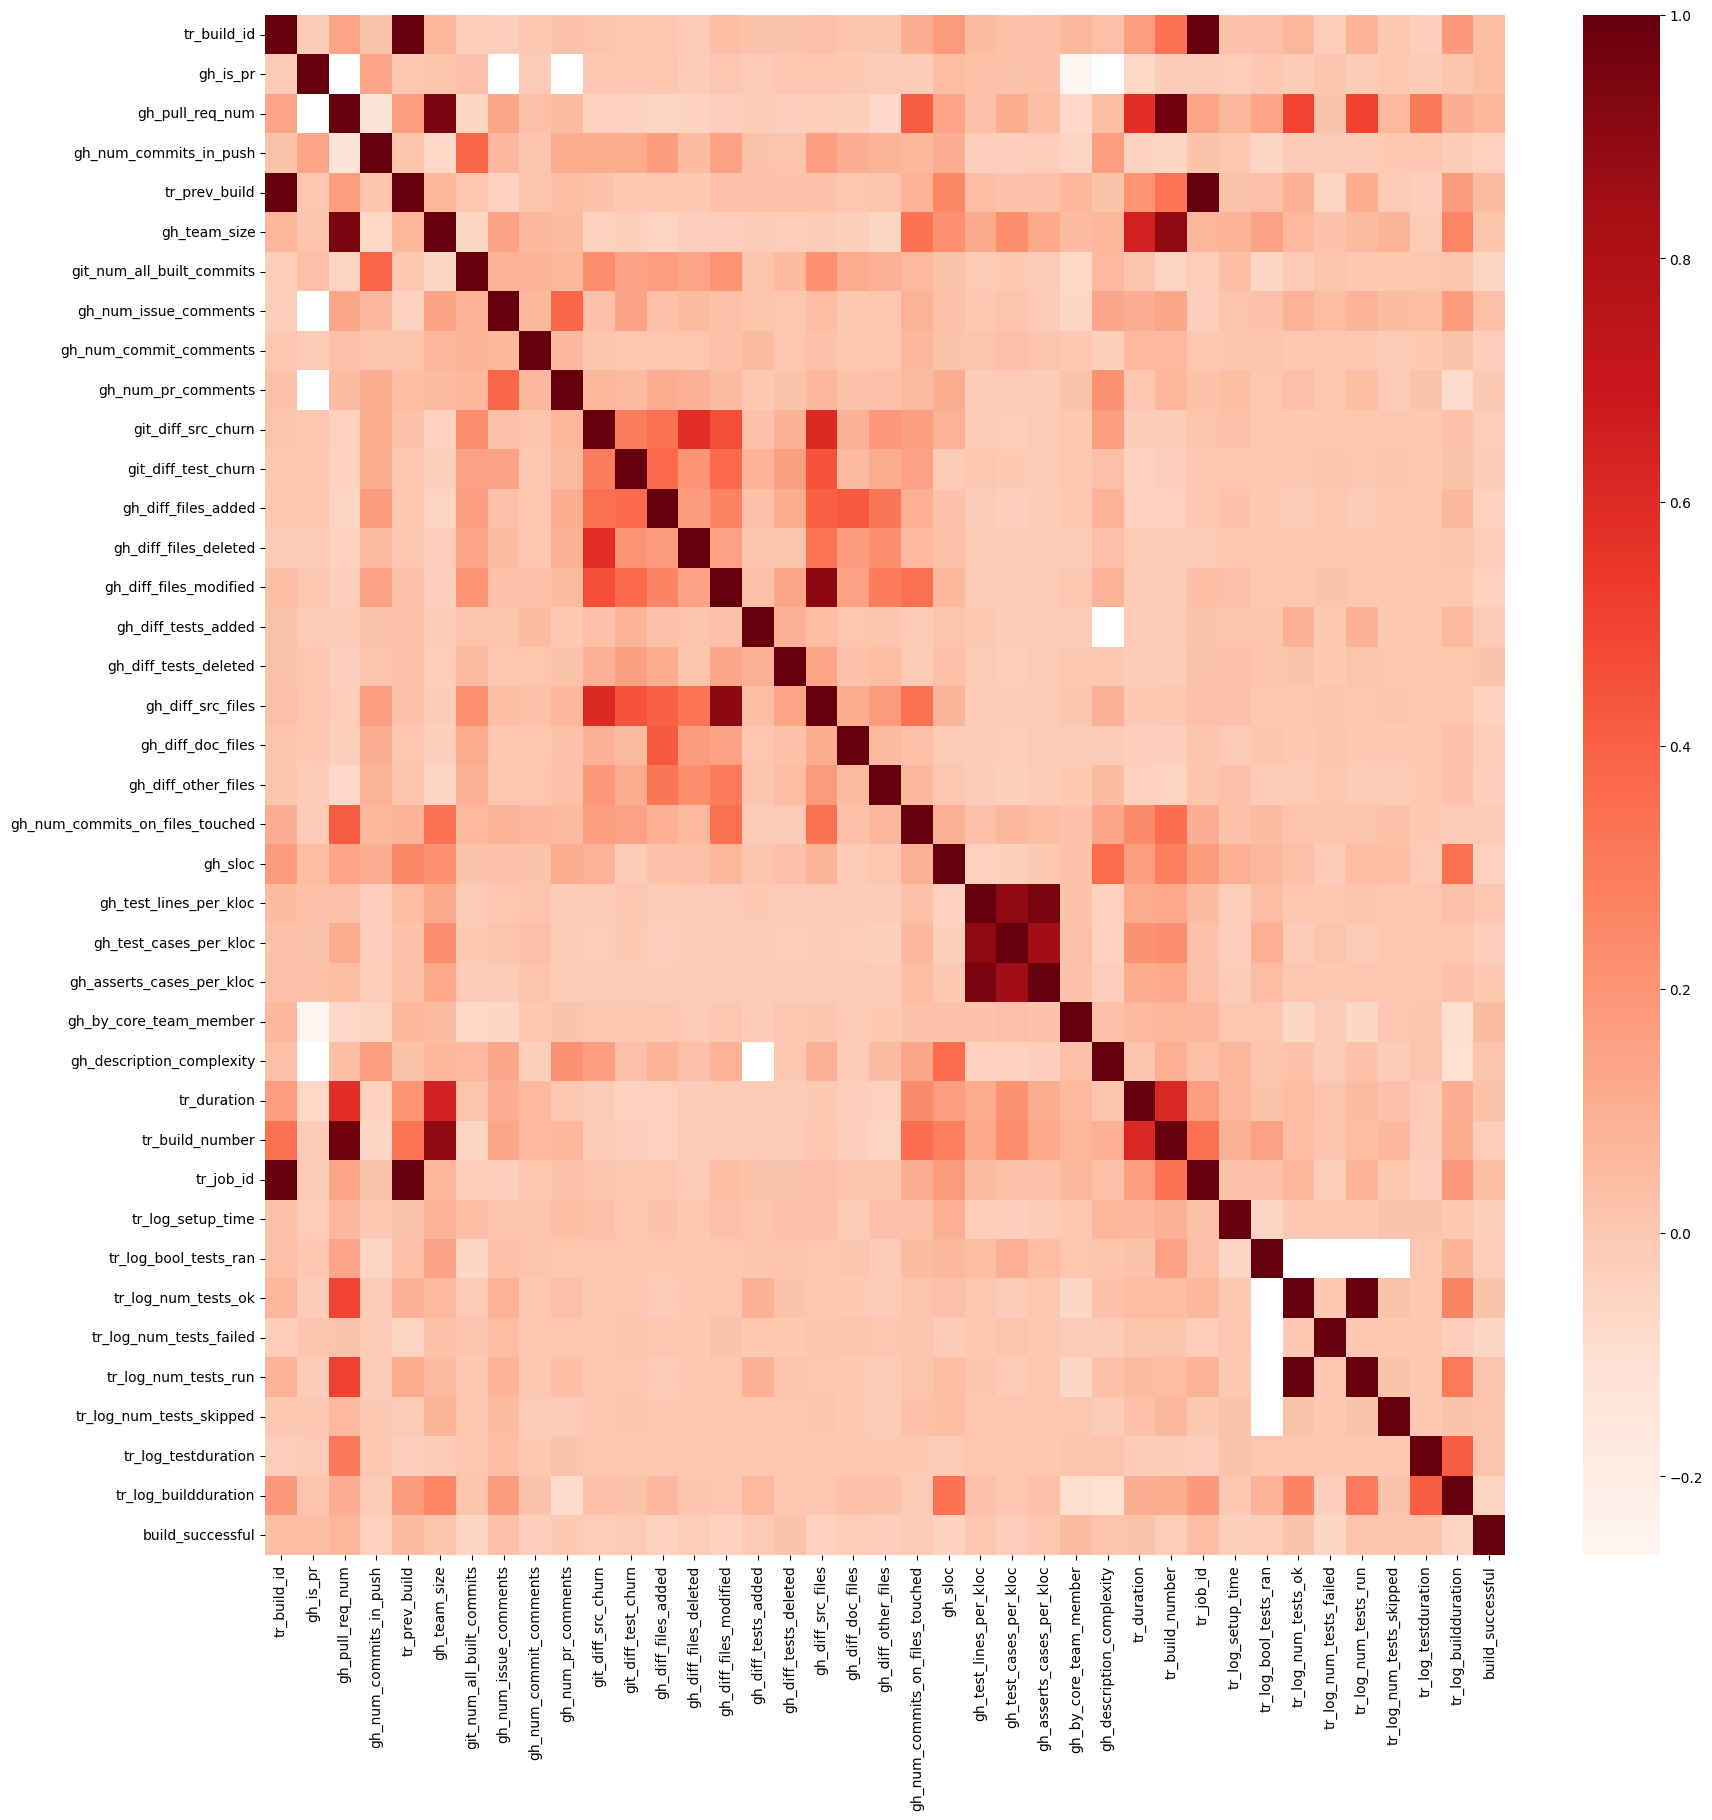

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/projet ets/Raw data.csv')

plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), cmap='Reds')
plt.show()


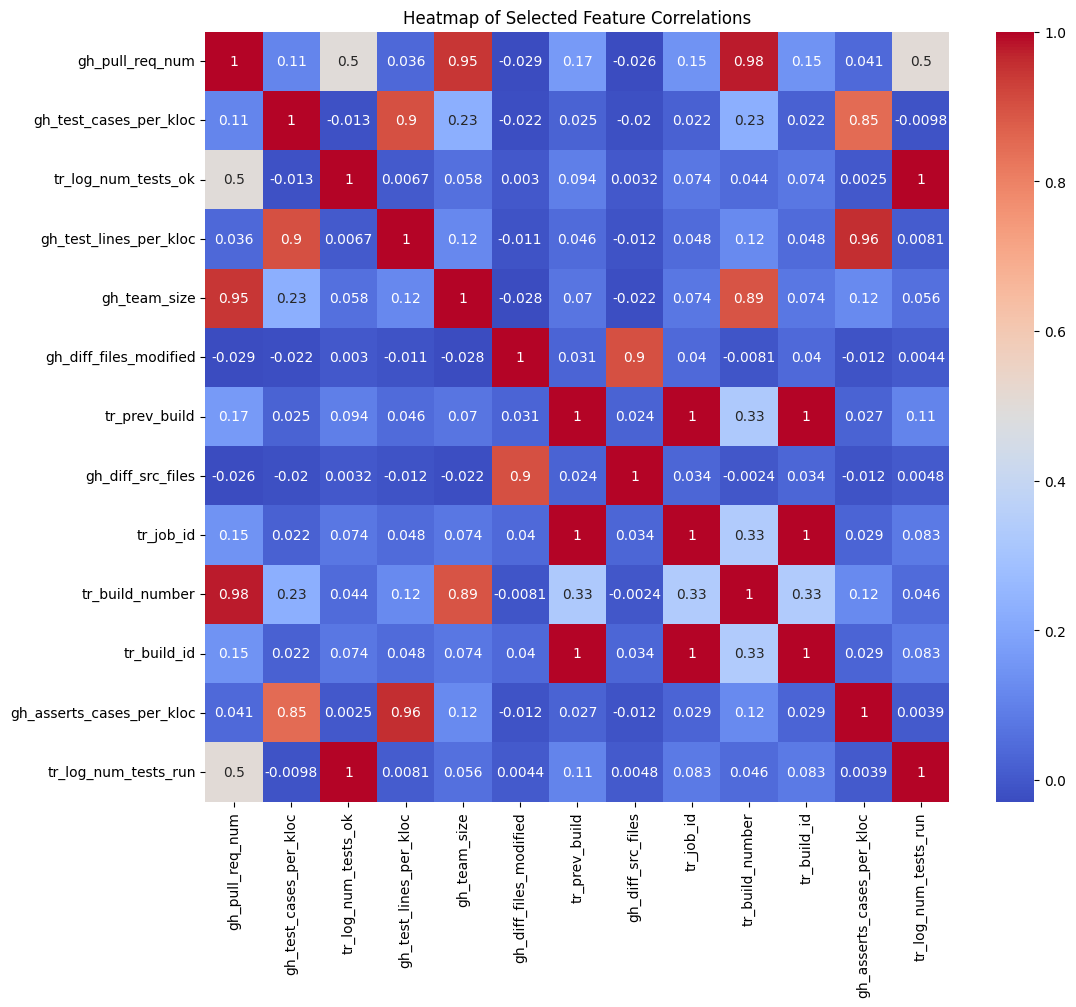

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = '/content/drive/MyDrive/projet ets/Raw data.csv'

df = pd.read_csv(file_path)

feature_pairs = [
    ('tr_build_id', 'tr_job_id'),
    ('tr_log_num_tests_ok', 'tr_log_num_tests_run'),
    ('tr_build_id', 'tr_prev_build'),
    ('tr_prev_build', 'tr_job_id'),
    ('gh_pull_req_num', 'tr_build_number'),
    ('gh_test_lines_per_kloc', 'gh_asserts_cases_per_kloc'),
    ('gh_pull_req_num', 'gh_team_size'),
    ('gh_diff_files_modified', 'gh_diff_src_files'),
    ('gh_test_lines_per_kloc', 'gh_test_cases_per_kloc'),
    ('gh_team_size', 'tr_build_number')
]

columns = set()
for pair in feature_pairs:
    columns.update(pair)
relevant_data = df[list(columns)]

corr_matrix = relevant_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Selected Feature Correlations')
plt.show()


In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/projet ets/Raw data.csv'

df = pd.read_csv(file_path)

corr_matrix = df.corr()

upper = corr_matrix.where(pd.np.triu(pd.np.ones(corr_matrix.shape), k=1).astype(bool))

stacked_corr = upper.stack().reset_index()

stacked_corr.columns = ['Variable 1', 'Variable 2', 'Correlation']

stacked_corr['AbsCorrelation'] = stacked_corr['Correlation'].abs()
sorted_corr = stacked_corr.sort_values(by='AbsCorrelation', ascending=False)

top_10_pairs = sorted_corr.head(20)

top_10_pairs = top_10_pairs.drop(columns=['AbsCorrelation'])
print(top_10_pairs)


                 Variable 1                 Variable 2  Correlation
28              tr_build_id                  tr_job_id     1.000000
712     tr_log_num_tests_ok       tr_log_num_tests_run     0.999999
3               tr_build_id              tr_prev_build     0.998567
166           tr_prev_build                  tr_job_id     0.998567
96          gh_pull_req_num            tr_build_number     0.975993
601  gh_test_lines_per_kloc  gh_asserts_cases_per_kloc     0.958887
73          gh_pull_req_num               gh_team_size     0.945808
439  gh_diff_files_modified          gh_diff_src_files     0.901596
600  gh_test_lines_per_kloc     gh_test_cases_per_kloc     0.899994
198            gh_team_size            tr_build_number     0.894228
616  gh_test_cases_per_kloc  gh_asserts_cases_per_kloc     0.848914
197            gh_team_size                tr_duration     0.646751
670             tr_duration            tr_build_number     0.617169
337      git_diff_src_churn          gh_diff_src

<ipython-input-26-2b824a49b414>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()
<ipython-input-26-2b824a49b414>:13: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  upper = corr_matrix.where(pd.np.triu(pd.np.ones(corr_matrix.shape), k=1).astype(bool))


In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/projet ets/Raw data.csv'

df = pd.read_csv(file_path)

columns_to_remove = [
    'tr_job_id', 'tr_log_num_tests_ok', 'tr_prev_build',
    'tr_build_number', 'gh_test_lines_per_kloc',
    'gh_team_size', 'gh_diff_src_files'
]

unique_columns_to_remove = list(set(columns_to_remove))

df_cleaned = df.drop(columns=unique_columns_to_remove)

df_cleaned.to_csv('/content/drive/MyDrive/projet ets/corelation final/coleratedRemoved.csv', index=False)

print(df_cleaned.head())


   tr_build_id gh_project_name  gh_is_pr gh_pr_created_at  gh_pull_req_num  \
0    100762903     rails/rails     False              NaN              NaN   
1     64945491     rails/rails     False              NaN              NaN   
2      8634372     rails/rails     False              NaN              NaN   
3      8713404     rails/rails     False              NaN              NaN   
4    101136102     rails/rails     False              NaN              NaN   

  gh_lang git_merged_with git_branch  gh_num_commits_in_push  \
0    ruby             NaN     master                     NaN   
1    ruby             NaN     master                     2.0   
2    ruby             NaN     master                     2.0   
3    ruby             NaN     master                     1.0   
4    ruby             NaN     master                     2.0   

                                  gh_commits_in_push  ... tr_log_frameworks  \
0                                                NaN  ...          

In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/projet ets/corelation final/coleratedRemoved.csv'

df = pd.read_csv(file_path)

# Removing identifiers
identifiers_to_remove = ['git_all_built_commits', 'git_num_all_built_commits', 'git_trigger_commit', 'tr_virtual_merged_into', 'tr_original_commit','gh_commits_in_push','git_prev_built_commit']
df = df.drop(columns=identifiers_to_remove)

# Exporting the Cleaned Data
df.to_csv('/content/drive/MyDrive/projet ets/corelation final/coleratedRemoved_IdsRemoved.csv', index=False)


In [ ]:
#Encoding

In [ ]:
import pandas as pd

def missing_values_percentage(file_path):
    df = pd.read_csv(file_path)

    missing_percentage = df.isnull().mean() * 100

    missing_percentage_sorted = missing_percentage.sort_values(ascending=False)

    for column, percentage in missing_percentage_sorted.items():
        print(f"{column}: {percentage:.2f}% missing values")

file_path = '/content/drive/MyDrive/projet ets/corelation final/coleratedRemoved_IdsRemoved.csv'  # Replace with your CSV file path
missing_values_percentage(file_path)


tr_log_tests_failed: 94.94% missing values
tr_log_buildduration: 88.50% missing values
gh_description_complexity: 86.68% missing values
gh_num_pr_comments: 85.42% missing values
gh_pr_created_at: 85.42% missing values
gh_pull_req_num: 85.42% missing values
git_merged_with: 85.42% missing values
gh_num_issue_comments: 85.42% missing values
tr_log_setup_time: 40.36% missing values
gh_first_commit_created_at: 19.72% missing values
gh_pushed_at: 19.72% missing values
gh_num_commits_in_push: 19.72% missing values
tr_log_num_tests_run: 15.87% missing values
tr_log_num_tests_skipped: 10.18% missing values
tr_log_testduration: 9.99% missing values
tr_log_frameworks: 9.49% missing values
tr_log_num_tests_failed: 7.19% missing values
tr_log_bool_tests_failed: 6.84% missing values
tr_log_bool_tests_ran: 0.00% missing values
tr_log_analyzer: 0.00% missing values
tr_log_status: 0.00% missing values
tr_log_lan: 0.00% missing values
tr_jobs: 0.00% missing values
tr_duration: 0.00% missing values
tr_s

In [ ]:
import pandas as pd
from google.colab import drive



# columns to remove
columns_to_remove = [
    'tr_log_tests_failed',
    'tr_log_buildduration',
    'gh_description_complexity',
    'gh_num_pr_comments',
    'gh_pr_created_at',
    'gh_pull_req_num',
    'git_merged_with',
    'gh_num_issue_comments',
    'tr_log_setup_time'
]

df = pd.read_csv('/content/drive/MyDrive/projet ets/corelation final/coleratedRemoved_IdsRemoved_LinesRemoved2.csv')

df.drop(columns=columns_to_remove, inplace=True)

df.to_csv('/content/drive/MyDrive/projet ets/corelation final/coleratedRemoved_IdsRemoved_LinesRemoved2_cleaned.csv', index=False)


In [ ]:
import pandas as pd
from google.colab import drive


# Defining the columns to impute
columns_to_impute = [
    'gh_first_commit_created_at',
    'gh_pushed_at',
    'gh_num_commits_in_push',
    'tr_log_num_tests_run',
    'tr_log_num_tests_skipped',
    'tr_log_testduration',
    'tr_log_frameworks',
    'tr_log_num_tests_failed',
    'tr_log_bool_tests_failed'
]

df = pd.read_csv('/content/drive/MyDrive/projet ets/corelation final/coleratedRemoved_IdsRemoved_LinesRemoved2_cleaned.csv')

for column in columns_to_impute:
    if df[column].dtype == 'object':
        df[column].fillna('Unknown', inplace=True)
    elif df[column].dtype == 'float64':
        df[column].fillna(df[column].mean(), inplace=True)
    elif df[column].dtype == 'int64':
        df[column].fillna(df[column].median(), inplace=True)

df.to_csv('/content/drive/MyDrive/projet ets/corelation final/coleratedRemoved_IdsRemoved_LinesRemoved2_cleaned_imputed.csv', index=False)


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from datetime import datetime
import ast
df = pd.read_csv('/content/drive/MyDrive/projet ets/corelation final/coleratedRemoved_IdsRemoved_LinesRemoved2_cleaned_imputed.csv')

def list_length(list_str):
    try:
        lst = ast.literal_eval(list_str)
        if isinstance(lst, list):
            return len(lst)
        return 0
    except:
        return 0

list_col = 'tr_jobs'
df[list_col] = df[list_col].apply(list_length)

def convert_to_timestamp(date_str):
    try:
        return datetime.strptime(date_str, '%Y-%m-%dT%H:%M:%S').timestamp()
    except ValueError:
        return None

date_columns = ['gh_first_commit_created_at', 'gh_pushed_at', 'gh_build_started_at']
for col in date_columns:
    df[col] = df[col].apply(convert_to_timestamp)

label_encoders = {}
categorical_cols = ['gh_project_name', 'gh_is_pr', 'gh_lang', 'git_branch',
                    'git_prev_commit_resolution_status', 'gh_by_core_team_member',
                    'tr_status', 'tr_log_lan', 'tr_log_status', 'tr_log_analyzer',
                    'tr_log_frameworks']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

boolean_cols = ['tr_log_bool_tests_ran', 'tr_log_bool_tests_failed', 'build_successful']
boolean_map = {'True': 1, 'False': 0}
df[boolean_cols] = df[boolean_cols].replace(boolean_map)

numerical_cols = ['gh_num_commits_in_push', 'gh_num_commit_comments', 'git_diff_src_churn',
                  'git_diff_test_churn', 'gh_diff_files_added', 'gh_diff_files_deleted',
                  'gh_diff_files_modified', 'gh_diff_tests_added', 'gh_diff_tests_deleted',
                  'gh_diff_doc_files', 'gh_diff_other_files', 'gh_num_commits_on_files_touched',
                  'gh_sloc', 'gh_test_cases_per_kloc', 'gh_asserts_cases_per_kloc', 'tr_duration',
                  'tr_log_num_tests_failed', 'tr_log_num_tests_run', 'tr_log_num_tests_skipped',
                  'tr_log_testduration']

scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


df.to_csv('/content/drive/MyDrive/projet ets/corelation final/encoded/encoded.csv', index=False)



In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/projet ets/corelation final/encoded/encoded.csv')

df = df[~df.isin(['Unknown']).any(axis=1)]

boolean_columns = ['tr_log_bool_tests_ran', 'tr_log_bool_tests_failed']

df[boolean_columns] = df[boolean_columns].astype(bool).astype(int)

output_file_path = '/content/drive/MyDrive/projet ets/corelation final/encoded/encoded_noString.csv'
df.to_csv(output_file_path, index=False)

output_file_path


'/content/drive/MyDrive/projet ets/corelation final/encoded/encoded_noString.csv'

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/projet ets/corelation final/encoded/encoded_noString.csv')

df = df.dropna()

df.to_csv('/content/drive/MyDrive/projet ets/corelation final/encoded/encoded_noString_noNan.csv', index=False)


In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/projet ets/Raw data.csv'
df = pd.read_csv(file_path)

category_counts = df['gh_project_name'].value_counts()

print("Number of rows in each category in 'gh_project_name':")
print(category_counts)

Number of rows in each category in 'gh_project_name':
rails/rails                         2370
jruby/jruby                          640
activerecord-hackery/ransack         222
jruby/activerecord-jdbc-adapter      186
spree/spree                          180
                                    ... 
gogotanaka/Rubype                      1
intridea/hashie                        1
pewniak747/hipbot                      1
sosedoff/lxc-ruby                      1
middleman/middleman-autoprefixer       1
Name: gh_project_name, Length: 773, dtype: int64


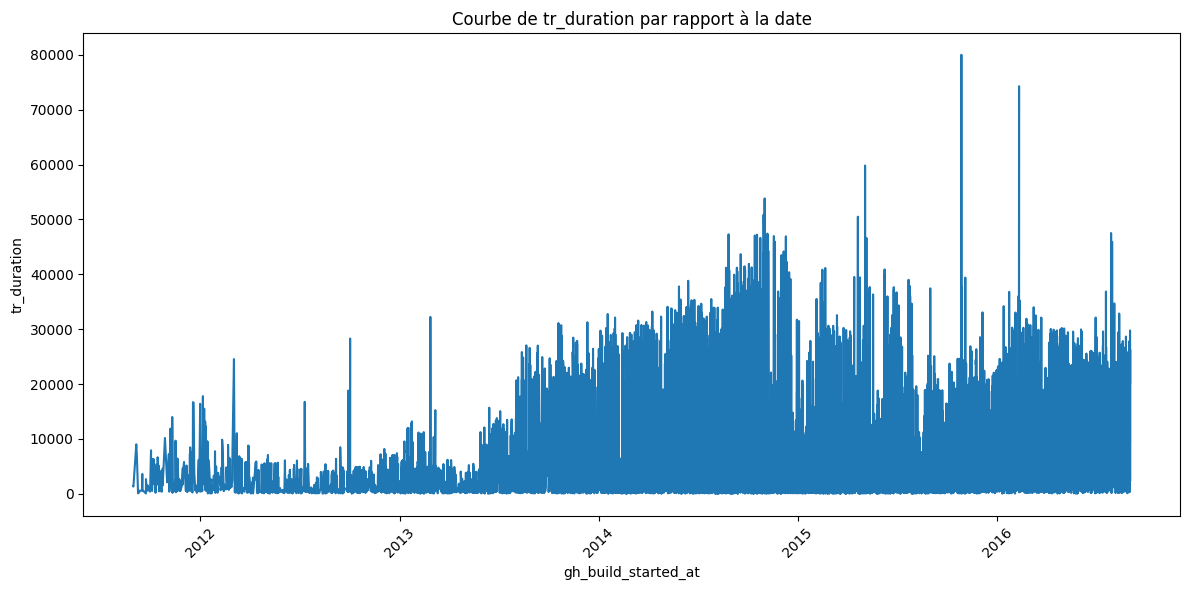

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/content/drive/MyDrive/projet ets/Raw data.csv')

data = data.sort_values(by='gh_build_started_at')
data['gh_build_started_at'] = pd.to_datetime(data['gh_build_started_at'])
data['tr_duration'] = data['tr_duration'].apply(lambda x: min(x, 80000))


plt.figure(figsize=(12, 6))
plt.plot(data['gh_build_started_at'], data['tr_duration'])
plt.title('Courbe de tr_duration par rapport à la date')
plt.xlabel('gh_build_started_at')
plt.ylabel('tr_duration')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
